In [110]:
import numpy as np
import matplotlib.pyplot as plt


In [111]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

In [28]:
def gradient_descent(f, grad_f, x0, kmax, tolf, tolx, do_backtracking,alpha_value=0.01):
    # Initialize lists to store the iterates, function values, gradients, and errors
    x = [x0]
    f_val = [f(x0)]
    grads = [grad_f(x0)]
    err = [np.linalg.norm(grad_f(x0))]
    
    for k in range(kmax):
        # Compute next iterate we set the step size to 0.01
        if do_backtracking == True:
            alpha = backtracking(f, grad_f, x[-1])
        else:
            alpha = alpha_value
        x_new = x[-1] - grad_f(x[-1]) * alpha

        # Update the lists
        x.append(x_new)
        f_val.append(f(x_new))
        grads.append(grad_f(x_new))
        err.append(np.linalg.norm(grad_f(x_new)))
        
        # Check for convergence
        if np.linalg.norm(grad_f(x_new)) < tolf * np.linalg.norm(grad_f(x0)) or np.linalg.norm(x_new - x[-2]) < tolx:
            break
        

    return x, k, f_val, grads, err

In [121]:
def compare_gradient_descent_strategies(f,grad_f,x_star):
    #initialize the lists
    x_all,k_all,f_val_all,grads_all,err_all = [],[],[],[],[]

    #compute the gradient descent with backtracking
    x, k, f_val, grads, err = gradient_descent(f, grad_f, np.array([0, 0]), 100, 1e-5, 1e-5, True)
    x_all.append(x)
    k_all.append(k) 
    f_val_all.append(f_val)
    grads_all.append(grads)
    err_all.append(err)

    #compute the gradient descent for different values of alpha
    alphas=np.array([0.01,0.03,0.07,0.1])
    for i in alphas:
        x, k, f_val, grads, err = gradient_descent(f, grad_f, np.array([0, 0]), 100, 1e-5, 1e-5, False,alpha_value=i)
        x_all.append(x)
        k_all.append(k) 
        f_val_all.append(f_val)
        grads_all.append(grads)
        err_all.append(err)


    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the error vector
    for i in range(len(alphas)):
        axs[0].plot(err_all[i+1], label='alpha='+str(alphas[i]))
    axs[0].plot(err_all[0], label="backtracking")
    axs[0].set_xlabel('Iterations')
    axs[0].set_ylabel('Error')
    axs[0].legend()
    axs[0].set_title('Error vector for different values of alpha(||grad(f(x_k))||)')
    

    # Initialize the list to store ||xk − x∗||2
    dist_all = []

    # Compute the gradient descent with backtracking and for different values of alpha
    for i in range(len(alphas) + 1):
        dist = [np.linalg.norm(x - x_star) for x in x_all[i]]
        dist_all.append(dist)

    # Plot ||xk − x∗||2
    for i in range(len(alphas)):
        axs[1].plot(dist_all[i+1], label='alpha='+str(alphas[i]))
    axs[1].plot(dist_all[0], label="backtracking")
    axs[1].set_xlabel('Iterations')
    axs[1].set_ylabel('||xk − x∗||2')
    axs[1].legend()
    axs[1].set_title('||xk − x∗||2 for different values of alpha')
    plt.show()

    # Gradient descent iterations
    x_init = np.array([0, 0])
    alpha = 0.07
    n_iters = 100
    x = gradient_descent(f, grad_f, x_init, n_iters, 1e-5, 1e-5, False, alpha)[0]
    x_all = np.array(x)

    # Generate grid for contour plot
    x = np.linspace(-1, 5, 100)
    y = np.linspace(-1, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(np.array([X, Y]))

    # Plot contour
    plt.figure(figsize=(6, 6))
    plt.contour(X, Y, Z, levels=np.logspace(0, 3, 20))
    plt.plot(*x_star,"r*", markersize=20)  # plot the true minimum

    # Plot the path defined by the iterations
    plt.plot(*zip(*x_all), 'd-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Contour plot and path defined by the iterations')
    plt.show()


$$f (x_1, x_2) = (x_1 − 3)^2 + (x_2 − 1)^2$$

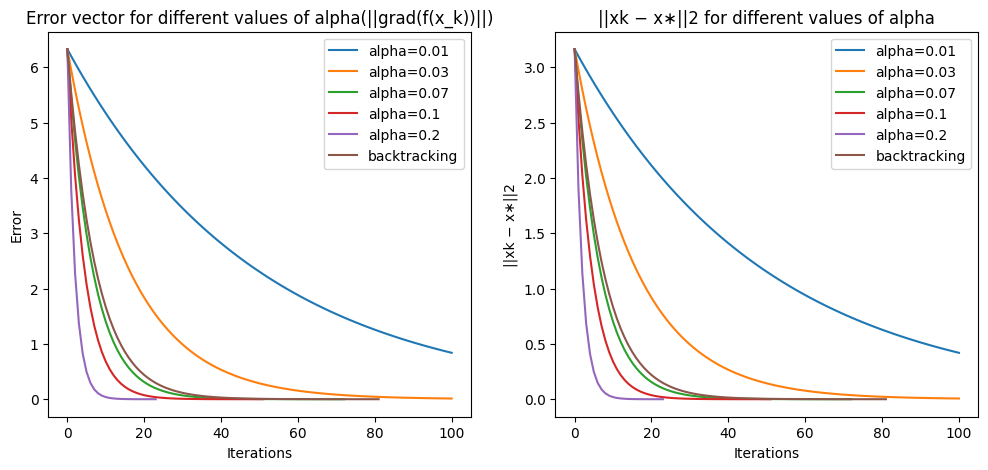

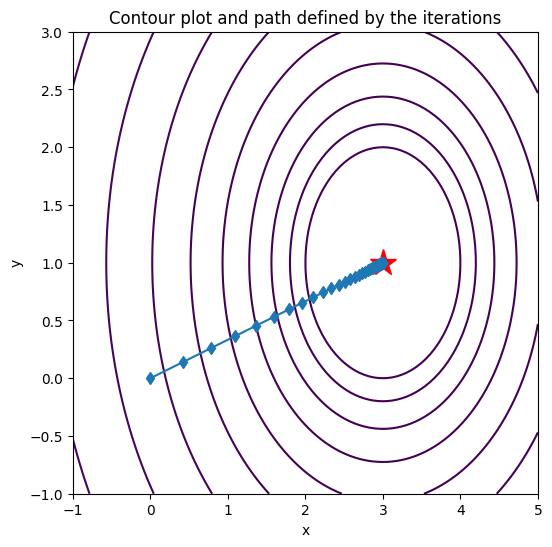

In [119]:
def f1(x):
    return (x[0] - 3)**2 + (x[1] - 1)**2

def grad_f1(x):
    return np.array([2*(x[0] - 3),
                     2*(x[1] - 1)])

compare_gradient_descent_strategies(f1,grad_f1,np.array([3,1]))

$$f (x_1, x_2) = 10(x_1 − 1)^2 + (x_2 − 2)^2$$

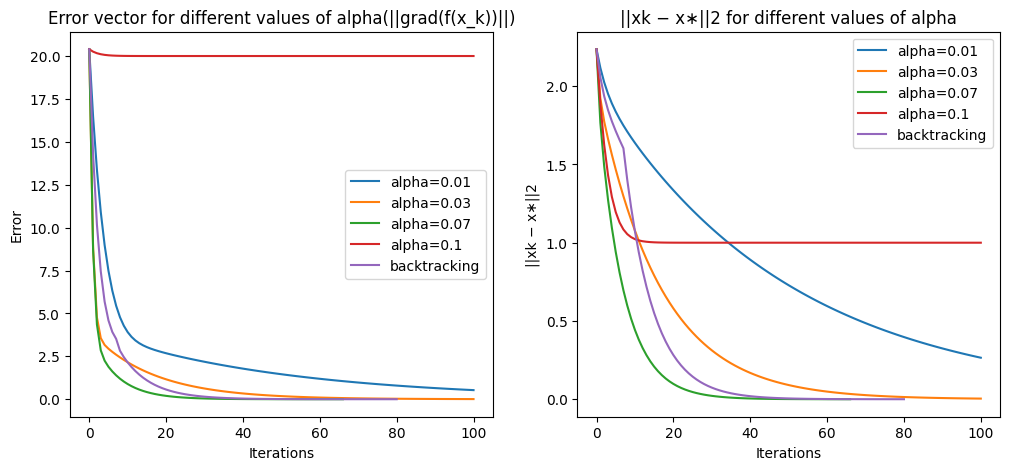

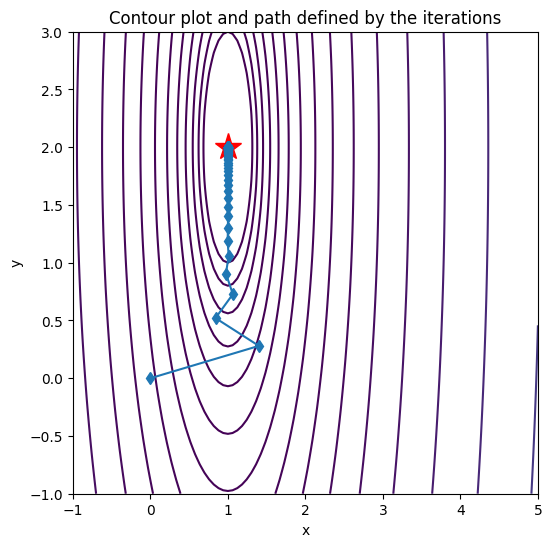

In [122]:
def f2(x):
    return 10*(x[0] - 1)**2 + (x[1] - 2)**2

def grad_f2(x):
    return np.array([20*(x[0] - 1),
                     2*(x[1] - 2)])

compare_gradient_descent_strategies(f2,grad_f2,np.array([1,2]))

$$ f (x) = \frac{1}{2} \lVert Ax − b \rVert _2^2$$


In [174]:
def function3_4(n,lambd=None,alphas=np.array([0.01,0.02,0.05])):
    v = np.linspace(0,1,n)
    A = np.vander(v)
    x_true = np.ones((1,n)).T
    b = A @ x_true
    if lambd==None:
        def f3_4(x):
            return 0.5 * np.linalg.norm(A @ x - b, 2) ** 2
        def grad_f3_4(x):
            return A.T @ (A @ x - b)
    else:
        def f3_4(x):
            return (np.linalg.norm(A @ x - b,2) ** 2)/2 + (lambd * np.linalg.norm(x,2)**2 / 2)
        def grad_f3_4(x):
            return A.T @ (A @ x - b) + lambd * x
    
    x_all,k_all,f_val_all,grads_all,err_all = [],[],[],[],[]

    #compute the gradient descent with backtracking
    x, k, f_val, grads, err = gradient_descent(f3_4, grad_f3_4, np.zeros((n,)), 100, 1e-5, 1e-5, True)
    x_all.append(x)
    k_all.append(k) 
    f_val_all.append(f_val)
    grads_all.append(grads)
    err_all.append(err)

    #compute the gradient descent for different values of alpha
    
    for i in alphas:
        x, k, f_val, grads, err = gradient_descent(f3_4, grad_f3_4, np.zeros((n,)), 100, 1e-5, 1e-5, False,alpha_value=i)
        x_all.append(x)
        k_all.append(k) 
        f_val_all.append(f_val)
        grads_all.append(grads)
        err_all.append(err)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the error vector
    for i in range(len(alphas)):
        axs[0].plot(err_all[i+1], label='alpha='+str(alphas[i]))
    axs[0].plot(err_all[0], label="backtracking")
    axs[0].set_xlabel('Iterations')
    axs[0].set_ylabel('Error')
    axs[0].legend()
    if lambd==None:    
        axs[0].set_title('Error vector for different values of alpha(||grad(f(x_k))||)'+ "\n"+"n="+str(n))
    else:
        axs[0].set_title('Error vector for different values of alpha(||grad(f(x_k))||)'+ "\n"+"n="+str(n)+"\n"+"lambda="+str(lambd))
    

    # Initialize the list to store ||xk − x∗||2
    dist_all = []

    # Compute the gradient descent with backtracking and for different values of alpha
    x_star=np.ones((n,))
    for i in range(len(alphas) + 1):
        dist = [np.linalg.norm(x - x_star) for x in x_all[i]]
        dist_all.append(dist)

    # Plot ||xk − x∗||2
    for i in range(len(alphas)):
        axs[1].plot(dist_all[i+1], label='alpha='+str(alphas[i]))
    axs[1].plot(dist_all[0], label="backtracking")
    axs[1].set_xlabel('Iterations')
    axs[1].set_ylabel('||xk − x∗||2')
    axs[1].legend()
    if lambd==None:    
        axs[1].set_title('||xk − x∗||2 for different values of alpha'+"\n"+"n="+str(n))   
    else:
        axs[1].set_title('||xk − x∗||2 for different values of alpha'+"\n"+"n="+str(n)+"\n"+"lambda="+str(lambd))
    plt.show()

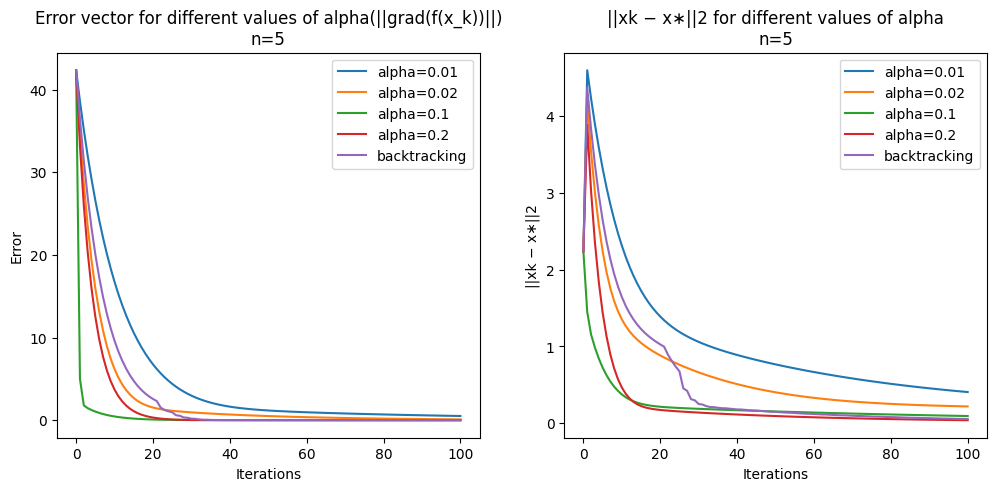

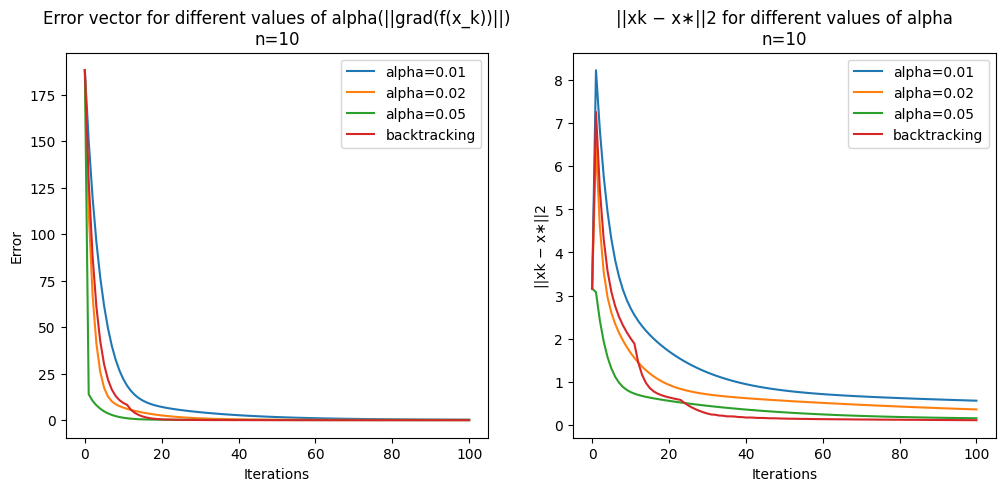

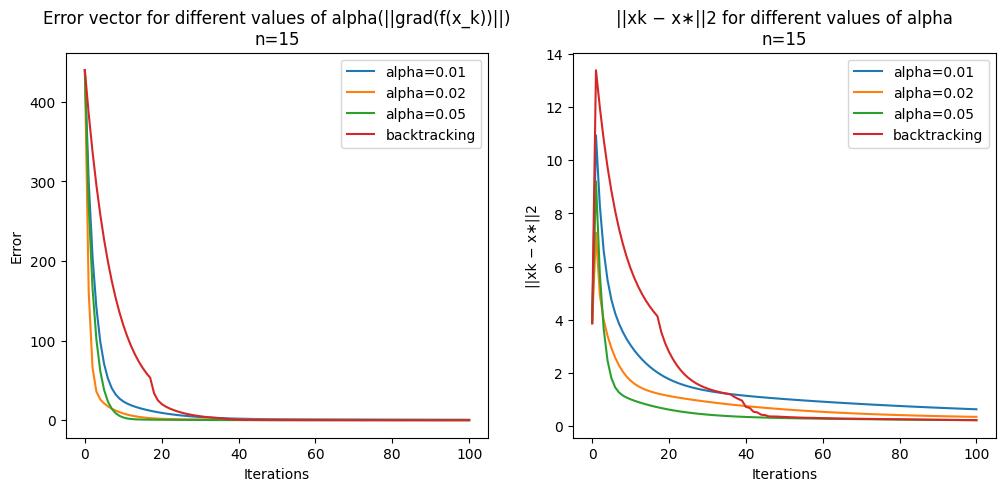

In [175]:
function3_4(5,alphas=np.array([0.01,0.02,0.1,0.2]))
function3_4(10)
function3_4(15)

$$ f (x) = \frac{1}{2} \lVert Ax − b \rVert _2^2 + \frac{\lambda}{2} \lVert x \rVert _2^2$$

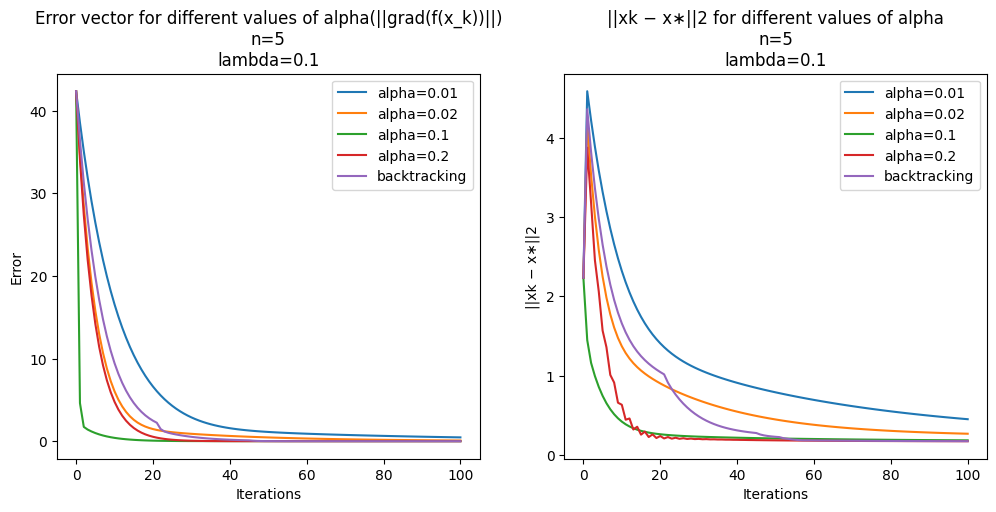

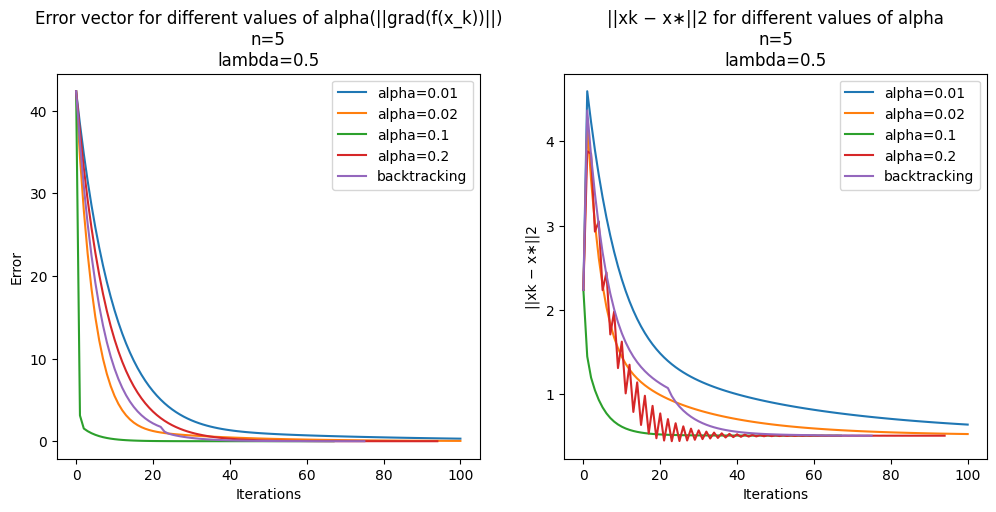

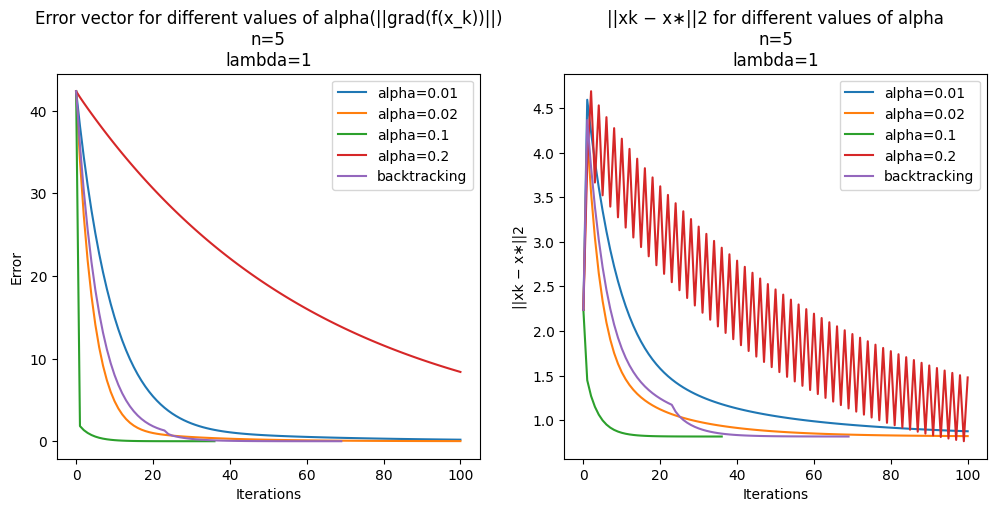

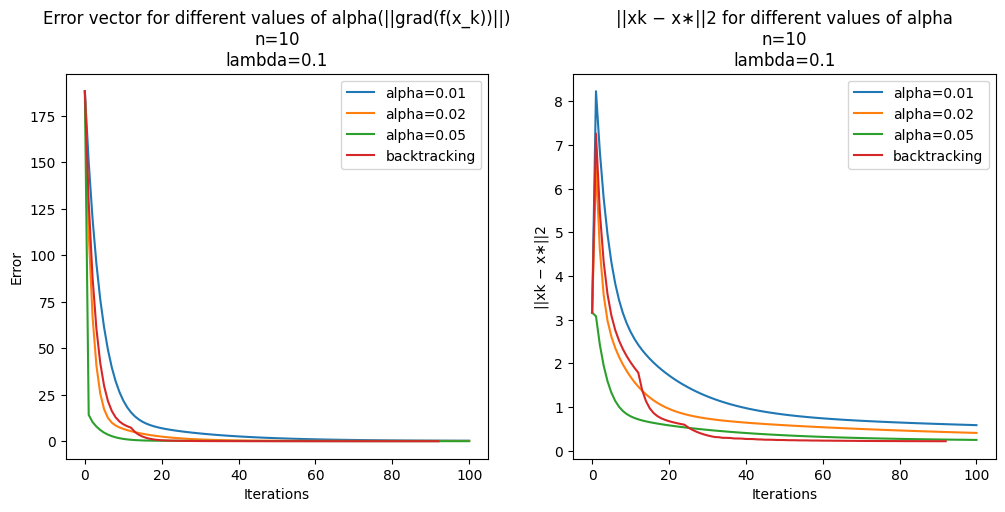

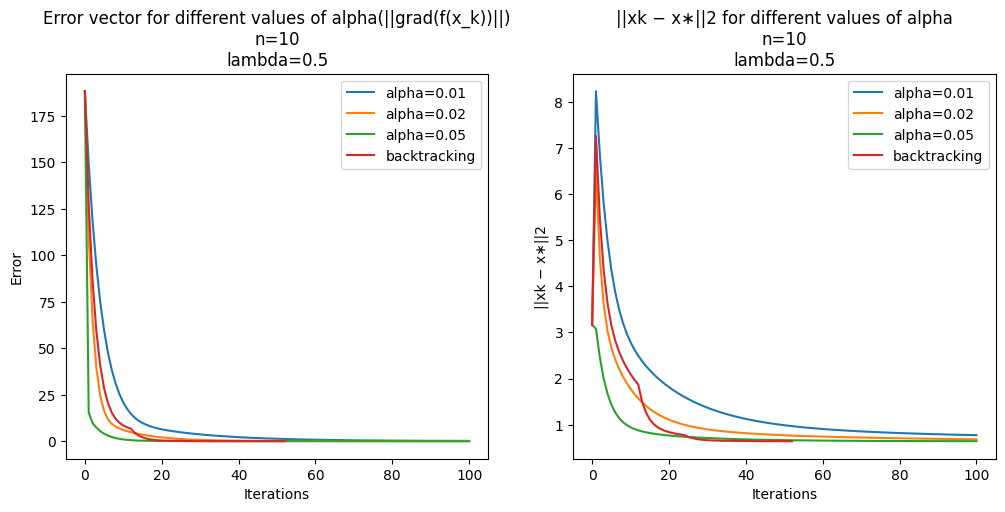

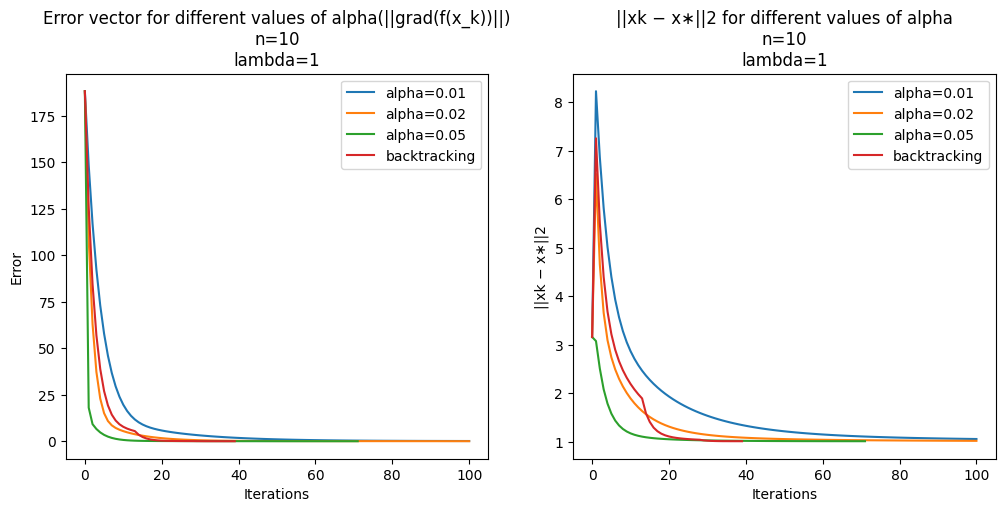

In [179]:
function3_4(5,0.1,np.array([0.01,0.02,0.1,0.2]))
function3_4(5,0.5,np.array([0.01,0.02,0.1,0.2]))
function3_4(5,1,np.array([0.01,0.02,0.1,0.2]))
function3_4(10,0.1)
function3_4(10,0.5)
function3_4(10,1)

$$f (x) = x^4 + x^3 − 2x^2 − 2x $$

In [223]:
def f_5(x):
    return x[0]**4 + x[0]**3 - 2*(x[0]**2) - 2*x[0]

def grad_f_5(x):
    return np.array([4*(x[0]**3) + 3*(x[0]**2) - 4*x[0] - 2])

def function_5(f,grad_f):
    #initialize the lists
    x_all,k_all,f_val_all,grads_all,err_all = [],[],[],[],[]

    #compute the gradient descent with backtracking
    x, k, f_val, grads, err = gradient_descent(f_5, grad_f_5, np.array([0]), 100, 1e-5, 1e-5, True)
    x_all.append(x)
    k_all.append(k) 
    f_val_all.append(f_val)
    grads_all.append(grads)
    err_all.append(err)

    #compute the gradient descent for different values of alpha
    alphas=np.array([0.01,0.03,0.07,0.2])
    for i in alphas:
        x, k, f_val, grads, err = gradient_descent(f_5, grad_f_5, np.array([0]), 100, 1e-5, 1e-5, False,alpha_value=i)
        x_all.append(x)
        k_all.append(k) 
        f_val_all.append(f_val)
        grads_all.append(grads)
        err_all.append(err)


    plt.figure(figsize=(6, 5))
    for i in range(len(alphas)):
        plt.plot(err_all[i+1], label='alpha='+str(alphas[i]))
    plt.plot(err_all[0], label="backtracking")
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.legend()
    plt.title('Error vector for different values of alpha(||grad(f(x_k))||)')


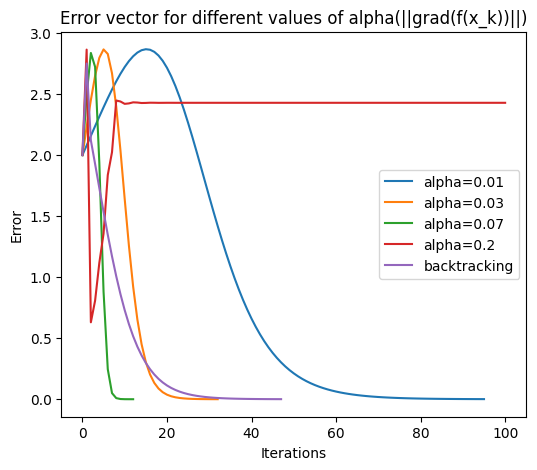

In [224]:
function_5(f_5,grad_f_5)

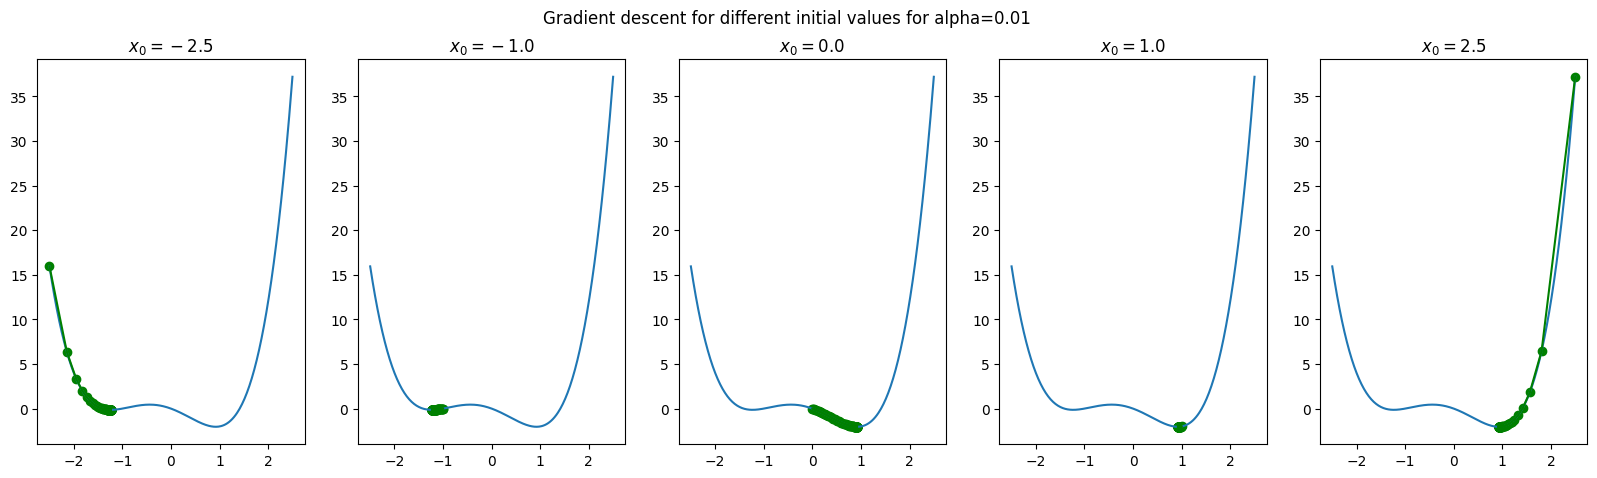

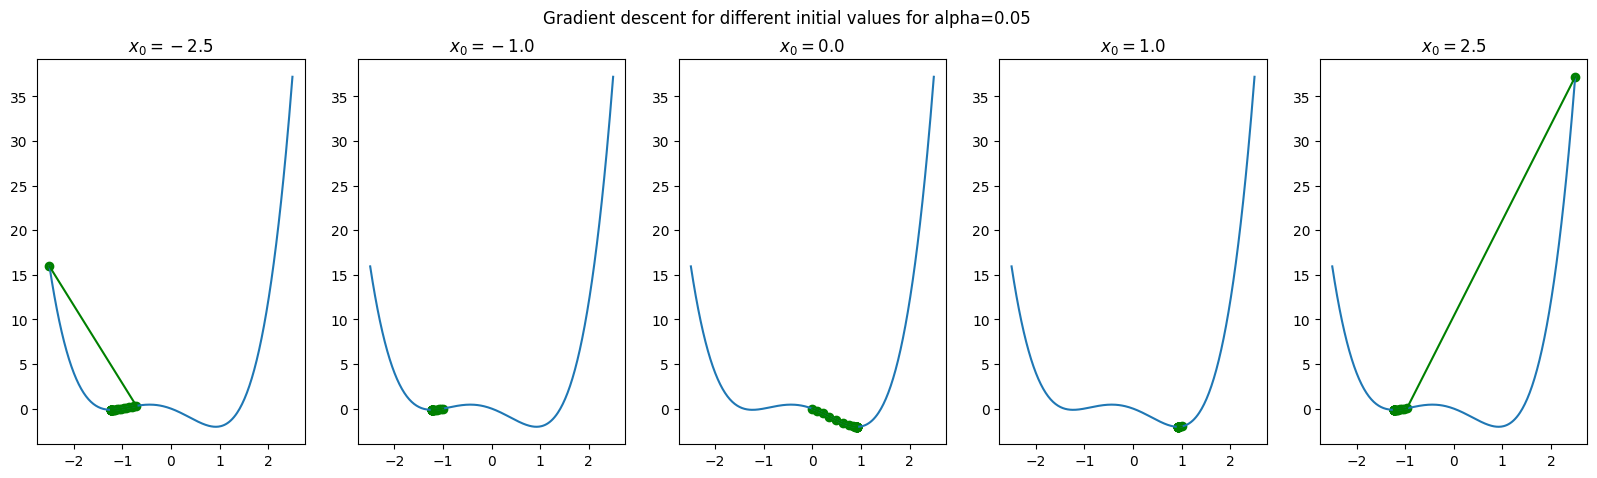

In [271]:
x_init = np.array([-2.5,-1,0,1,2.5])
def ploting_of_f_5(alpha_value):
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    fig.suptitle('Gradient descent for different initial values for alpha='+str(alpha_value))
    for i in range(5):
        #plot the function
        p = np.linspace(-2.5,2.5,300)
        axs[i].plot(p,f_5(np.array([p])))
        axs[i].set_title(f"$x_0 = {x_init[i]}$")
        #gradient descent
        x=gradient_descent(f_5, grad_f_5, np.array([x_init[i]]), 100, 1e-5, 1e-5,False,alpha_value)[0]  
        axs[i].scatter([xi[0] for xi in x], [f_5(np.array([xi[0]])) for xi in x],c="g")
        #draw a line between the points
        for j in range(len(x)-1):
            axs[i].plot([x[j][0],x[j+1][0]],[f_5(np.array([x[j][0]])),f_5(np.array([x[j+1][0]]))],c="g")
    plt.show()

ploting_of_f_5(0.01)
ploting_of_f_5(0.05)